In [2]:
print('Part A')
print('DOMAIN: Telecom')
print('CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers.You can analyse all relevant customer data and develop focused customer retention programs.')
print('DATA DESCRIPTION:  Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about ')
print('Customers who left within the last month – the column is called Churn')
print('Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies ')
print('Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges')
print('Demographic info about customers – gender, age range, and if they have partners and dependents')
print('PROJECT OBJECTIVE: To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.')

Part A
DOMAIN: Telecom
CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers.You can analyse all relevant customer data and develop focused customer retention programs.
DATA DESCRIPTION:  Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about 
Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies 
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
PROJECT OBJECTIVE: To Build a model that will help to identify the potential customers who have a higher probability to

In [3]:
print('Import all the relevant libraries')
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# standard scaler
from sklearn.preprocessing import StandardScaler
#label encoder
from sklearn.preprocessing import LabelEncoder
#vizualization
import seaborn as sns   # Why sns?  It's a reference to The West Wing #industry std is sns
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline
# for colab
import io
import xgboost as xgb


Import all the relevant libraries


In [4]:
print('Data Understanding: [5 Marks]\n')
print('A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]')
from google.colab import files
uploaded = files.upload()
 
df_telcom_cust1 = pd.read_csv(io.BytesIO(uploaded['TelcomCustomer-Churn_1.csv']))
print(df_telcom_cust1.shape)
df_telcom_cust1.head(5)

Data Understanding: [5 Marks]

A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]


Saving TelcomCustomer-Churn_1.csv to TelcomCustomer-Churn_1.csv
(7043, 10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [5]:
print('B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]')
uploaded1 = files.upload()
df_telcom_cust2 = pd.read_csv(io.BytesIO(uploaded1['TelcomCustomer-Churn_2.csv']))
print(df_telcom_cust2.shape)
df_telcom_cust2.head(5)

B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]


Saving TelcomCustomer-Churn_2.csv to TelcomCustomer-Churn_2.csv
(7043, 12)


,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
print('C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]')
df_telecom = pd.merge(df_telcom_cust1, df_telcom_cust2, on=['customerID'])
print(df_telecom.shape)
print(df_telecom.head(5))
print('there are totally 7043 rows and 21 columns\n')

C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]
(7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic        

In [7]:
print('D.Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]\n')
print('the columns matching in churn1  data frame and the merged Data Frame is \n')
print(df_telecom.columns.intersection(df_telcom_cust1.columns))
print('the columns matching in churn2  data frame and the mergred Data Frame is \n')
print(df_telecom.columns.intersection(df_telcom_cust2.columns))
print('All columns are present')

D.Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]

the columns matching in churn1  data frame and the merged Data Frame is 

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')
the columns matching in churn2  data frame and the mergred Data Frame is 

Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
All columns are present


In [8]:
print('Data Cleaning & Analysis\n')
print('A.Impute missing/unexpected values in the DataFrame. [2 Marks] \n')
print('check for missing values')
percent_missing = df_telecom.isnull().sum() * 100 / len(df_telecom)
print(percent_missing)
print('there are no missing values however TotalCharges contain blanks check if they needed to be imputed')
df_telecom['TotalCharges'] = df_telecom['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)
percent_missing = df_telecom.isnull().sum() * 100 / len(df_telecom)
print(percent_missing)
print('there is 1.5 percent of the data out of 7000 which has balnks or now NAN \n')

Data Cleaning & Analysis

A.Impute missing/unexpected values in the DataFrame. [2 Marks] 

check for missing values
customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64
there are no missing values however TotalCharges contain blanks check if they needed to be imputed
customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
Onlin

In [9]:
print('check the data where TotalCharges is null \n')
print('all data belong to No churn Class we can impute the columns with the median of the column\n')
print('convert TotalCharges to type float64 \n')
df_telecom['TotalCharges'] = df_telecom['TotalCharges'].astype('float64')
print('Replace NAN with median of the columns as there seem to be a lot of variance hence mean is not a good option\n')
df_telecom['TotalCharges'].fillna(df_telecom['TotalCharges'].median(), inplace=True)
percent_missing = df_telecom.isnull().sum() * 100 / len(df_telecom)
print(percent_missing)

check the data where TotalCharges is null 

all data belong to No churn Class we can impute the columns with the median of the column

convert TotalCharges to type float64 

Replace NAN with median of the columns as there seem to be a lot of variance hence mean is not a good option

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


In [10]:
print('B.Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]\n')
df_telecom['tenure'] = df_telecom['tenure'].astype('float64')
df_telecom['customerID'] = df_telecom['customerID'].astype('category')
df_telecom['gender'] = df_telecom['gender'].astype('category')
df_telecom['SeniorCitizen'] = df_telecom['SeniorCitizen'].astype('category')
df_telecom['Partner'] = df_telecom['Partner'].astype('category')
df_telecom['Dependents'] = df_telecom['Dependents'].astype('category')
df_telecom['PhoneService'] = df_telecom['PhoneService'].astype('category')
df_telecom['MultipleLines'] = df_telecom['MultipleLines'].astype('category')
df_telecom['InternetService'] = df_telecom['InternetService'].astype('category')
df_telecom['OnlineSecurity'] = df_telecom['OnlineSecurity'].astype('category')
df_telecom['OnlineBackup'] = df_telecom['OnlineBackup'].astype('category')
df_telecom['DeviceProtection'] = df_telecom['DeviceProtection'].astype('category')
df_telecom['OnlineBackup'] = df_telecom['OnlineBackup'].astype('category')
df_telecom['DeviceProtection'] = df_telecom['DeviceProtection'].astype('category')
df_telecom['TechSupport'] = df_telecom['TechSupport'].astype('category')
df_telecom['StreamingTV'] = df_telecom['StreamingTV'].astype('category')
df_telecom['StreamingMovies'] = df_telecom['StreamingMovies'].astype('category')
df_telecom['Contract'] = df_telecom['Contract'].astype('category')
df_telecom['PaperlessBilling'] = df_telecom['PaperlessBilling'].astype('category')
df_telecom['PaymentMethod'] = df_telecom['PaymentMethod'].astype('category')
df_telecom['Churn'] = df_telecom['Churn'].astype('category')
df_telecom.info()

B.Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   category
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   float64 
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   c

In [11]:
print('Dropping the customer_id columns as its irrelavant\n')
df_telecom = df_telecom.drop(labels= "customerID" , axis = 1)
df_telecom.head(5)

Dropping the customer_id columns as its irrelavant



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


C.Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features



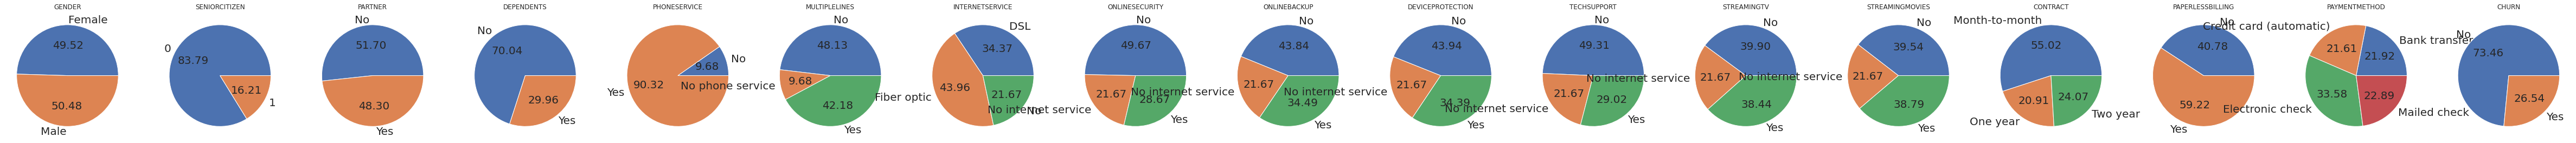

In [12]:
print('C.Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features\n')
def pie_chart(df_pie,m):
    
    #get all the column names in the dataframe
    a = []
    for i in df_pie:
        a.append(i)
    
    #isolate the categorical variable names from a to b
    b = []
    for i in a:
        if (df_pie[i].dtype.name) == 'category':
            b.append(i)
        
    plt.figure(figsize=(100, 100))
    plt.subplots_adjust(hspace=1)
      
    # number of columns, as inputted while calling the function
    ncols = m
    # calculate number of rows
    nrows = len(b) // ncols + (len(b) % ncols > 0)
    
    # loop through the length of 'b' and keep track of index
    for n, i in enumerate(b):
        # add a new subplot iteratively using nrows and ncols
        ax = plt.subplot(nrows, ncols, n + 1)

        # filter df and plot 'i' on the new subplot axis
        df_pie.groupby(i).size().plot(kind='pie', autopct='%.2f', textprops={'fontsize': 20})
        
        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
    plt.show()

pie_chart(df_telecom,20)    

Checking more insights



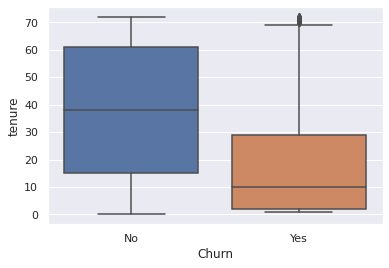

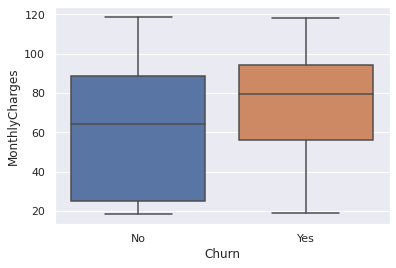

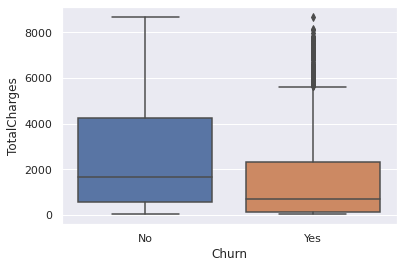

The Churn=Yes Customers have a short tenure period
 
The Churn=Yes Customers pay higher monthly charges
 


In [13]:
print('Checking more insights\n')
for i in ['tenure','MonthlyCharges','TotalCharges']:
 sns.boxplot(y= i , x ='Churn',data = df_telecom)
 plt.show()

print('The Churn=Yes Customers have a short tenure period\n ')
print('The Churn=Yes Customers pay higher monthly charges\n ')

In [14]:
print('C.Share insights for Q2.c. [2 Marks]\n')
print('Target Variable Churn has more NO churn than Yes data is imbalanced\n')
print('90% people have PhoneService\n')
print('44% people have Internetservice\n')
print('55% people have opted for month on month contract\n')

C.Share insights for Q2.c. [2 Marks]

Target Variable Churn has more NO churn than Yes data is imbalanced

90% people have PhoneService

44% people have Internetservice

55% people have opted for month on month contract



In [15]:
print('E.Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]\n')
oneHotCols=["OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod","gender","SeniorCitizen",
            "Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity"]
df_telecom=pd.get_dummies(df_telecom, columns=oneHotCols)   
df_telecom.head(10)

E.Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]



,tenure,MonthlyCharges,TotalCharges,Churn,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,...,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes
0,1.0,29.85,29.85,No,0,0,1,1,0,0,...,0,0,1,0,1,0,0,1,0,0
1,34.0,56.95,1889.50,No,1,0,0,0,0,1,...,1,1,0,0,1,0,0,0,0,1
2,2.0,53.85,108.15,Yes,0,0,1,1,0,0,...,1,1,0,0,1,0,0,0,0,1
3,45.0,42.30,1840.75,No,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
4,2.0,70.70,151.65,Yes,1,0,0,1,0,0,...,1,1,0,0,0,1,0,1,0,0
5,8.0,99.65,820.50,Yes,1,0,0,0,0,1,...,1,0,0,1,0,1,0,1,0,0
6,22.0,89.10,1949.40,No,0,0,1,1,0,0,...,1,0,0,1,0,1,0,1,0,0
7,10.0,29.75,301.90,No,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
8,28.0,104.80,3046.05,Yes,1,0,0,0,0,1,...,1,0,0,1,0,1,0,1,0,0
9,62.0,56.15,3487.95,No,0,0,1,1,0,0,...,1,1,0,0,1,0,0,0,0,1


In [16]:
print('Split the data into 80% train and 20% test\n')
X = df_telecom.drop("Churn", axis=1)
y = df_telecom['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

Split the data into 80% train and 20% test



In [17]:
print('Normalize/Standardize the data with the best suitable approach\n')
#Scaling Numerical columns
std = StandardScaler()
num_cols = ["MonthlyCharges","TotalCharges","tenure"]
scaled_train = std.fit_transform(X_train[num_cols])
scaled_train = pd.DataFrame(scaled_train, columns=num_cols)
X_train_og = X_train.copy()
X_train = X_train.drop(columns = num_cols, axis = 1)
X_train = X_train.merge(scaled_train, left_index=True, right_index=True, how = "left")
#test data 
scaled_test = std.fit_transform(X_test[num_cols])
scaled_test = pd.DataFrame(scaled_test, columns=num_cols)
X_test_og = X_test.copy()
X_test = X_test.drop(columns = num_cols, axis = 1)
X_test = X_test.merge(scaled_test, left_index=True, right_index=True, how = "left")


Normalize/Standardize the data with the best suitable approach



In [19]:
X_train.head(2)

,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,...,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,MonthlyCharges,TotalCharges,tenure
1814,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0.992311,1.972751,1.617806
5946,0,0,1,0,0,1,0,0,1,1,...,0,1,0,0,0,0,1,NaN,NaN,NaN


In [21]:
print('Train a model using XGBoost. Also print best performing parameters along with train and test performance\n')
#base xgb
res_xgb=xgb.XGBRFClassifier(n_estimators=100,
                            reg_alpha = 0.003,
                            max_depth=10, 
                            gamma=10                         
                         )
res_xgb.fit(X_train, y_train)
print("test accuracy train: " , res_xgb.score(X_train, y_train))
y_test_pred = res_xgb.predict(X_test)
print("test accuracy train: " , res_xgb.score(X_test, y_test))
print('no overfitting but model can be improvised for more accuracy')

Train a model using XGBoost. Also print best performing parameters along with train and test performance

test accuracy train:  0.7834575789847356
test accuracy train:  0.78708303761533
no overfitting but model can be improvised for more accuracy


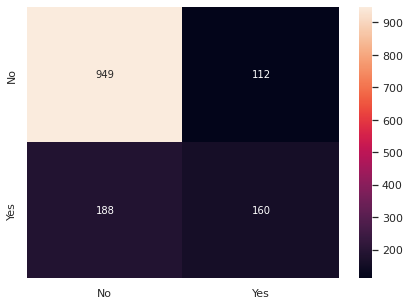

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_test_pred,labels=["No","Yes"])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1061
         Yes       0.59      0.46      0.52       348

    accuracy                           0.79      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.79      0.78      1409



In [62]:
print('Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance.\n')
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

res_xgb = xgb.XGBRFClassifier(scale_pos_weight=1,
                          learning_rate=0.01,  
                          colsample_bytree = 0.99,
                          subsample = 0.8,
                          objective='binary:logistic', 
                          n_estimators=100, 
                          reg_alpha = 0.003,
                          max_depth=10, 
                          gamma=10,
                          min_child_weight = 1
                         )

grid_search = GridSearchCV(
    estimator=res_xgb,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 12,
    cv = 10,
    verbose=True,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance.

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBRFClassifier(colsample_bytree=0.99, gamma=10,
                                       learning_rate=0.01, max_depth=10,
                                       reg_alpha=0.003),
             n_jobs=12,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             return_train_score=True, scoring='roc_auc', verbose=True)

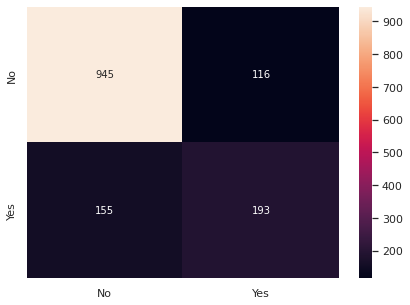

In [63]:
y_pred_gbc=grid_search.predict(X_test)
cm = confusion_matrix(y_test, y_pred_gbc,labels=["No","Yes"])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [64]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 180}

In [65]:
grid_search.best_score_

0.8369580953573121

In [66]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87      1061
         Yes       0.62      0.55      0.59       348

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [24]:
#Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)

import plotly.express as px #for visualization
import matplotlib.pyplot as plt #for visualization 

print('C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]')
df_telecom_B = pd.merge(df_telcom_cust1, df_telcom_cust2, on=['customerID'])
print(df_telecom_B.shape)
print(df_telecom_B.head(5))
print('there are totally 7043 rows and 21 columns\n')

#Get overview of the data
def dataoveriew(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
    
dataoveriew(df_telecom_B, 'Overview of the dataset')

C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]
(7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection T

In [25]:
target_instance = df_telecom_B["Churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Churn', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

In [26]:
#Defining bar chart function
def bar(feature, df=df_telecom_B ):
    #Groupby the categorical feature
    temp_df = df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str


    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)
    
    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )
     
    return fig.show()

In [27]:
#Gender feature plot
bar('gender')
#SeniorCitizen feature plot 
df_telecom_B.loc[df_telecom_B.SeniorCitizen==0,'SeniorCitizen'] = "No"   #convert 0 to No in all data instances
df_telecom_B.loc[df_telecom_B.SeniorCitizen==1,'SeniorCitizen'] = "Yes"  #convert 1 to Yes in all data instances
bar('SeniorCitizen')
#Partner feature plot
bar('Partner')
#Dependents feature plot
bar('Dependents')

In [28]:
bar('PhoneService')
bar('MultipleLines')
bar('InternetService')
bar('OnlineSecurity')
bar('OnlineBackup')
bar('DeviceProtection')
bar('TechSupport')
bar('StreamingTV')
bar('StreamingMovies')

bar('Contract')
bar('PaperlessBilling')
bar('PaymentMethod')

In [29]:
bar('Contract')
bar('PaperlessBilling')
bar('PaymentMethod')

In [30]:
# Let’s catch the error
try:
    df_telecom_B['TotalCharges'] = df_telecom_B['TotalCharges'].astype(float)
except ValueError as ve:
    print (ve)

could not convert string to float: 


In [31]:
df_telecom_B['TotalCharges'] = pd.to_numeric(df_telecom_B['TotalCharges'],errors='coerce')
#Fill the missing values with with the median value
a['TotalCharges'] = df_telecom_B['TotalCharges'].fillna(df_telecom_B['TotalCharges'].median())

In [33]:
# The customerID column isnt useful as the feature is used for identification of customers. 
df_telecom_B.drop(["customerID"],axis=1,inplace = True)

# Encode categorical features

#Defining the map function
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

## Encoding target feature
df_telecom_B['Churn'] = df_telecom_B[['Churn']].apply(binary_map)

# Encoding gender category
df_telecom_B['gender'] = df_telecom_B['gender'].map({'Male':1, 'Female':0})

#Encoding other binary category
binary_list = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
df_telecom_B[binary_list] = df_telecom_B[binary_list].apply(binary_map)

#Encoding the other categoric features with more than two categories
df_telecom_B = pd.get_dummies(df_telecom_B, drop_first=True)

In [34]:
# Checking the correlation between features
corr = df_telecom_B.corr()

fig = px.imshow(corr,width=1000, height=1000)
fig.show()

In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Change variable name separators to '_'
all_columns = [column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_") for column in df_telecom_B.columns]

#Effect the change to the dataframe column names
df_telecom_B.columns = all_columns

#Prepare it for the GLM formula
glm_columns = [e for e in all_columns if e not in ['customerID', 'Churn']]
glm_columns = ' + '.join(map(str, glm_columns))

#Fiting it to the Generalized Linear Model
glm_model = smf.glm(formula=f'Churn ~ {glm_columns}', data=df_telecom_B, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7043
Model:                            GLM   Df Residuals:                     7019
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2914.7
Date:                Sun, 03 Jul 2022   Deviance:                       5829.3
Time:                        13:17:35   Pearson chi2:                 8.04e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [39]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df_telecom_B['tenure'] = sc.fit_transform(df_telecom_B[['tenure']])
df_telecom_B['MonthlyCharges'] = sc.fit_transform(df_telecom_B[['MonthlyCharges']])
df_telecom_B['TotalCharges'] = sc.fit_transform(df_telecom_B[['TotalCharges']])

In [40]:
 #Import Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Split data into train and test sets
from sklearn.model_selection import train_test_split
X = df_telecom_B.drop('Churn', axis=1)
y = df_telecom_B['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)  

#Defining the modelling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)

    print_scores(alg, y_test, y_pred)
    return model

# Running logistic regression model
log_model = modeling(LogisticRegression, 'Logistic Regression')

Logistic Regression
accuracy:  0.7983909133932797
precision:  0.6281800391389433
recall:  0.5763016157989228
f1_score:  0.7955174819104321


In [41]:
# Feature selection to improve model building
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning:

The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.



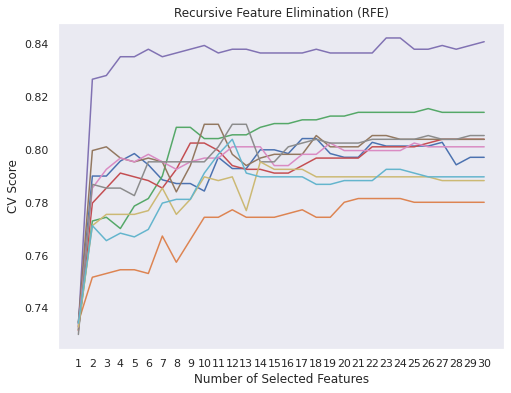

The optimal number of features: 23


In [42]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.grid()
plt.xticks(range(1, X.shape[1]+1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [44]:
#Saving dataframe with optimal features
X_rfe = X.iloc[:, rfecv.support_]

#Overview of the optimal features in comparison with the intial dataframe
print("\"X\" dimension: {}".format(X.shape))
print("\"X\" column list:", X.columns.tolist())
print("\"X_rfe\" dimension: {}".format(X_rfe.shape))
print("\"X_rfe\" column list:", X_rfe.columns.tolist())

"X" dimension: (7043, 30)
"X" column list: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', 'InternetService_Fiber_optic', 'InternetService_No', 'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes', 'OnlineBackup_No_internet_service', 'OnlineBackup_Yes', 'DeviceProtection_No_internet_service', 'DeviceProtection_Yes', 'TechSupport_No_internet_service', 'TechSupport_Yes', 'StreamingTV_No_internet_service', 'StreamingTV_Yes', 'StreamingMovies_No_internet_service', 'StreamingMovies_Yes', 'Contract_One_year', 'Contract_Two_year', 'PaymentMethod_Credit_card__automatic_', 'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check']
"X_rfe" dimension: (7043, 23)
"X_rfe" column list: ['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', '

In [46]:
### Trying other machine learning algorithms: SVC
svc_model = modeling(SVC, 'SVC Classification')

SVC Classification
accuracy:  0.795551348793185
precision:  0.6355748373101953
recall:  0.526032315978456
f1_score:  0.7889704158679894


In [47]:
#Random forest
rf_model = modeling(RandomForestClassifier, "Random Forest Classification")

Random Forest Classification
accuracy:  0.7832465688594415
precision:  0.6087912087912087
recall:  0.49730700179533216
f1_score:  0.7757626841800291


In [48]:
#Saving best model 
import joblib
#Sava the model to disk
filename = 'model.sav'
joblib.dump(log_model, filename)

['model.sav']

In [50]:
#Import libraries

import pandas as pd
import numpy as np
from PIL import Image

#load the model from disk
import joblib
model = joblib.load(r"./notebook/model.sav")

#Import python scripts
from preprocessing import preprocess

def main():
    #Setting Application title
    st.title('Telco Customer Churn Prediction App')

      #Setting Application description
    st.markdown("""
     :dart:  This Streamlit app is made to predict customer churn in a ficitional telecommunication use case.
    The application is functional for both online prediction and batch data prediction. \n
    """)
    st.markdown("<h3></h3>", unsafe_allow_html=True)

    #Setting Application sidebar default
    image = Image.open('App.jpg')
    add_selectbox = st.sidebar.selectbox(
    "How would you like to predict?", ("Online", "Batch"))
    st.sidebar.info('This app is created to predict Customer Churn')
    st.sidebar.image(image)

    if add_selectbox == "Online":
        st.info("Input data below")
        #Based on our optimal features selection
        st.subheader("Demographic data")
        seniorcitizen = st.selectbox('Senior Citizen:', ('Yes', 'No'))
        dependents = st.selectbox('Dependent:', ('Yes', 'No'))


        st.subheader("Payment data")
        tenure = st.slider('Number of months the customer has stayed with the company', min_value=0, max_value=72, value=0)
        contract = st.selectbox('Contract', ('Month-to-month', 'One year', 'Two year'))
        paperlessbilling = st.selectbox('Paperless Billing', ('Yes', 'No'))
        PaymentMethod = st.selectbox('PaymentMethod',('Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'))
        monthlycharges = st.number_input('The amount charged to the customer monthly', min_value=0, max_value=150, value=0)
        totalcharges = st.number_input('The total amount charged to the customer',min_value=0, max_value=10000, value=0)

        st.subheader("Services signed up for")
        mutliplelines = st.selectbox("Does the customer have multiple lines",('Yes','No','No phone service'))
        phoneservice = st.selectbox('Phone Service:', ('Yes', 'No'))
        internetservice = st.selectbox("Does the customer have internet service", ('DSL', 'Fiber optic', 'No'))
        onlinesecurity = st.selectbox("Does the customer have online security",('Yes','No','No internet service'))
        onlinebackup = st.selectbox("Does the customer have online backup",('Yes','No','No internet service'))
        techsupport = st.selectbox("Does the customer have technology support", ('Yes','No','No internet service'))
        streamingtv = st.selectbox("Does the customer stream TV", ('Yes','No','No internet service'))
        streamingmovies = st.selectbox("Does the customer stream movies", ('Yes','No','No internet service'))

        data = {
                'SeniorCitizen': seniorcitizen,
                'Dependents': dependents,
                'tenure':tenure,
                'PhoneService': phoneservice,
                'MultipleLines': mutliplelines,
                'InternetService': internetservice,
                'OnlineSecurity': onlinesecurity,
                'OnlineBackup': onlinebackup,
                'TechSupport': techsupport,
                'StreamingTV': streamingtv,
                'StreamingMovies': streamingmovies,
                'Contract': contract,
                'PaperlessBilling': paperlessbilling,
                'PaymentMethod':PaymentMethod, 
                'MonthlyCharges': monthlycharges, 
                'TotalCharges': totalcharges
                }
        features_df = pd.DataFrame.from_dict([data])
        st.markdown("<h3></h3>", unsafe_allow_html=True)
        st.write('Overview of input is shown below')
        st.markdown("<h3></h3>", unsafe_allow_html=True)
        st.dataframe(features_df)


        #Preprocess inputs
        preprocess_df = preprocess(features_df, 'Online')

        prediction = model.predict(preprocess_df)

        if st.button('Predict'):
            if prediction == 1:
                st.warning('Yes, the customer will terminate the service.')
            else:
                st.success('No, the customer is happy with Telco Services.')
        

    else:
        st.subheader("Dataset upload")
        uploaded_file = st.file_uploader("Choose a file")
        if uploaded_file is not None:
            data = pd.read_csv(uploaded_file)
            #Get overview of data
            st.write(data.head())
            st.markdown("<h3></h3>", unsafe_allow_html=True)
            #Preprocess inputs
            preprocess_df = preprocess(data, "Batch")
            if st.button('Predict'):
                #Get batch prediction
                prediction = model.predict(preprocess_df)
                prediction_df = pd.DataFrame(prediction, columns=["Predictions"])
                prediction_df = prediction_df.replace({1:'Yes, the customer will terminate the service.', 
                                                    0:'No, the customer is happy with Telco Services.'})

                st.markdown("<h3></h3>", unsafe_allow_html=True)
                st.subheader('Prediction')
                st.write(prediction_df)
            
if __name__ == '__main__':
        main()

FileNotFoundError: ignored